In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings
warnings.filterwarnings('ignore')

customer_csv_file_path = 'c:/Users/Awhy/OneDrive/Desktop/PARA/Project/PORTFOLIO/Repo/Portfolio/Sales Intelligence/Data/customer_data.csv'
marketings_csv_file_path = 'c:/Users/Awhy/OneDrive/Desktop/PARA/Project/PORTFOLIO/Repo/Portfolio/Sales Intelligence/Data/marketing_data.csv'
operational_csv_file_path = 'c:/Users/Awhy/OneDrive/Desktop/PARA/Project/PORTFOLIO/Repo/Portfolio/Sales Intelligence/Data/operational_data.csv'
sales_data_csv_file_path = 'c:/Users/Awhy/OneDrive/Desktop/PARA/Project/PORTFOLIO/Repo/Portfolio/Sales Intelligence/Data/sales_data.csv'
sales_team_data_csv_file_path = 'c:/Users/Awhy/OneDrive/Desktop/PARA/Project/PORTFOLIO/Repo/Portfolio/Sales Intelligence/Data/sales_team_data.csv'

customer_data = pd.read_csv(customer_csv_file_path)
marketing_data = pd.read_csv(marketings_csv_file_path)
operational_data = pd.read_csv(operational_csv_file_path)
sales_data = pd.read_csv(sales_data_csv_file_path)
sales_team_data = pd.read_csv(sales_team_data_csv_file_path)

In [16]:
# Display the first few rows of each separated dataset
(sales_data.head(), customer_data.head(), marketing_data.head(), sales_team_data.head(), operational_data.head())

(   Transaction ID  Product ID Product Category           Sales Date  Revenue  \
 0            1675         157     CRM software  2020-06-16 17:48:10  4369.92   
 1            2469         122     CRM software  2020-09-04 10:55:45  2667.18   
 2            7499         163    cloud storage  2020-07-31 21:23:17  2531.81   
 3            8171         101     CRM software  2020-10-17 06:13:23  3595.76   
 4            8831         198    cloud storage  2021-03-13 07:00:47  4696.67   
 
    Customer ID  
 0        13936  
 1        16275  
 2        14203  
 3        12954  
 4        18596  ,
    Customer ID  Customer Age       Location    Industry       Customer Since
 0        13936            38         Europe     Finance  2020-01-18 05:21:37
 1        16275            35  North America      Retail  2020-02-18 01:26:44
 2        14203            67         Europe  Technology  2020-05-08 17:29:01
 3        12954            44  South America      Retail  2020-02-19 15:33:31
 4        185

In [17]:
# Display basic innformation on the dataset
(sales_data.info(), customer_data.info(), marketing_data.info(), sales_team_data.info(), operational_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    1000 non-null   int64  
 1   Product ID        1000 non-null   int64  
 2   Product Category  1000 non-null   object 
 3   Sales Date        1000 non-null   object 
 4   Revenue           1000 non-null   float64
 5   Customer ID       1000 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 47.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Customer ID     1000 non-null   int64 
 1   Customer Age    1000 non-null   int64 
 2   Location        1000 non-null   object
 3   Industry        1000 non-null   object
 4   Customer Since  1000 non-null   object
dtypes: int64(2), object(3)
memory usage: 3

(None, None, None, None, None)

## Customer-Centric Analysis:

+ **Customer Profile Analysis:** Analyze customer demographics (age, location, industry) and their relationship with other factors like purchase patterns or support issues.
+ **Customer Lifetime Value (CLV) Analysis:** Using sales data, calculate the CLV of different customer segments.

In [18]:
# Merging Customer Data with Sales Data
sales_data['Sales Date'] = pd.to_datetime(sales_data['Sales Date'])  # Convert Sales Date to datetime
merged_sales_customer_data = pd.merge(customer_data, sales_data, on='Customer ID', how='inner')

# Check the first few rows of the merged data
merged_sales_customer_data_head = merged_sales_customer_data.head()

# Since operational data does not have Customer ID, we cannot directly merge it
# We'll check the first few rows of the operational data for reference
operational_data_head = operational_data.head()



(   Customer ID  Customer Age       Location    Industry       Customer Since  \
 0        13936            38         Europe     Finance  2020-01-18 05:21:37   
 1        16275            35  North America      Retail  2020-02-18 01:26:44   
 2        14203            67         Europe  Technology  2020-05-08 17:29:01   
 3        12954            44  South America      Retail  2020-02-19 15:33:31   
 4        18596            42         Europe  Healthcare  2021-01-21 03:52:55   
 
    Transaction ID  Product ID Product Category          Sales Date  Revenue  
 0            1675         157     CRM software 2020-06-16 17:48:10  4369.92  
 1            2469         122     CRM software 2020-09-04 10:55:45  2667.18  
 2            7499         163    cloud storage 2020-07-31 21:23:17  2531.81  
 3            8171         101     CRM software 2020-10-17 06:13:23  3595.76  
 4            8831         198    cloud storage 2021-03-13 07:00:47  4696.67  ,
    Support Ticket ID Issue Category 

**Distribution of Customer Age:** This histogram shows the frequency distribution of customer ages. It appears that the age distribution is somewhat uniform with a slight concentration in certain age groups. This distribution can be further analyzed to understand the age profile of customers making the most purchases.

**Distribution of Customers by Location:** This count plot illustrates the number of customers in each geographical location. Some locations have higher concentrations of customers, which may indicate market penetration or regional preferences.

**Distribution of Customers by Industry:** This count plot shows the distribution of customers across different industries. Certain industries may dominate the customer base, which could be important for targeted marketing or product development strategies.

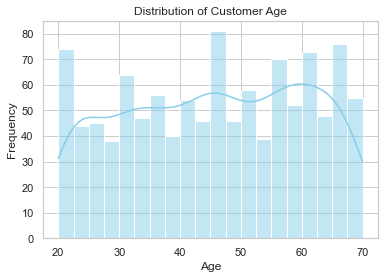

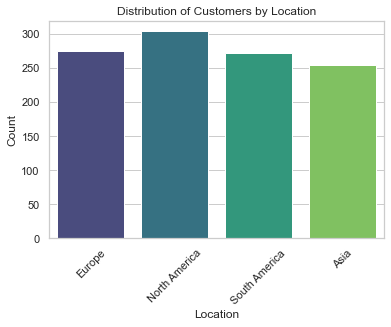

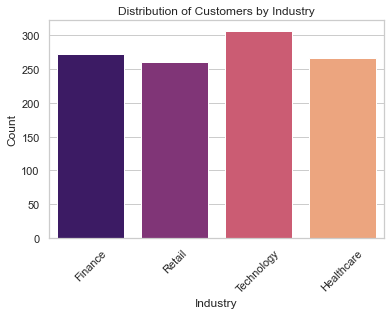

In [24]:
# Distribution of Customer Age
plt.figure(figsize=(6, 4))
sns.histplot(merged_sales_customer_data['Customer Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Distribution of Customers by Location
plt.figure(figsize=(6, 4))
sns.countplot(x='Location', data=merged_sales_customer_data, palette='viridis')
plt.title('Distribution of Customers by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Distribution of Customers by Industry
plt.figure(figsize=(6, 4))
sns.countplot(x='Industry', data=merged_sales_customer_data, palette='magma')
plt.title('Distribution of Customers by Industry')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


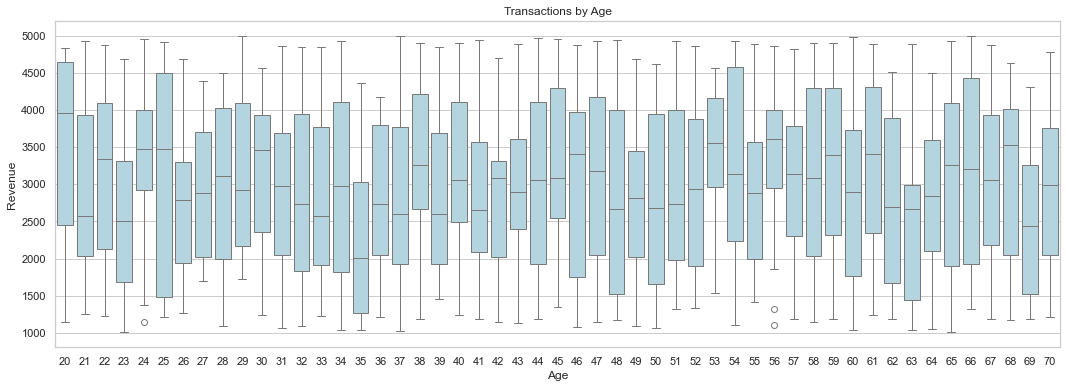

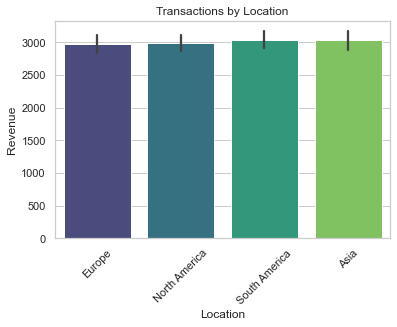

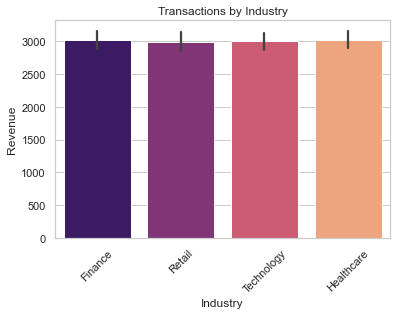

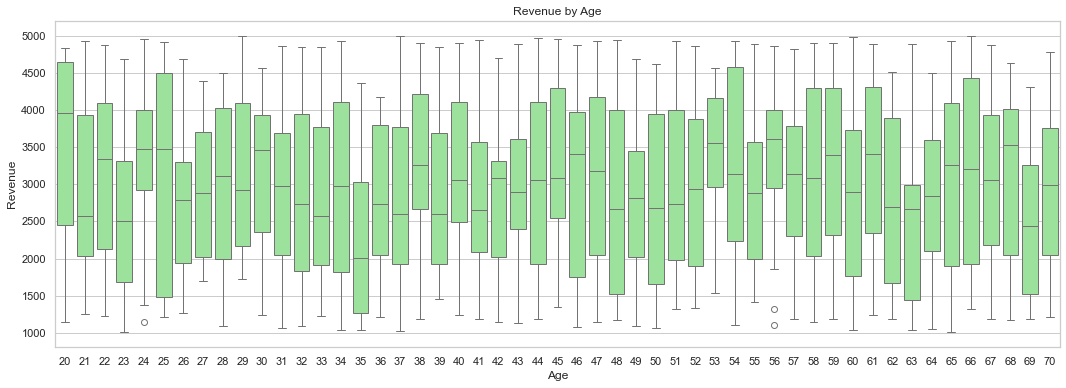

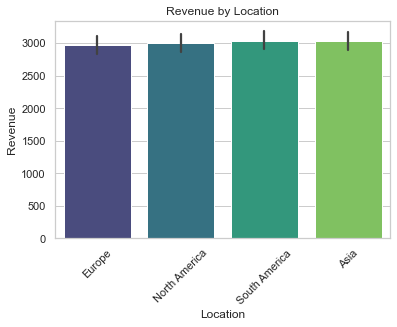

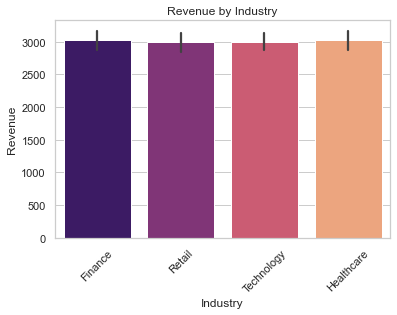

In [33]:
# Plot 1: Transactions by Age
plt.figure(figsize=(18, 6))
sns.boxplot(x='Customer Age', y='Revenue', data=merged_sales_customer_data, color='lightblue')
plt.title('Transactions by Age')
plt.xlabel('Age')
plt.ylabel('Revenue')
plt.show()

# Plot 2: Transactions by Location
plt.figure(figsize=(6, 4))
sns.barplot(x='Location', y='Revenue', data=merged_sales_customer_data, palette='viridis')
plt.title('Transactions by Location')
plt.xlabel('Location')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

# Plot 3: Transactions by Industry
plt.figure(figsize=(6, 4))
sns.barplot(x='Industry', y='Revenue', data=merged_sales_customer_data, palette='magma')
plt.title('Transactions by Industry')
plt.xlabel('Industry')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

# Plot 4: Revenue by Age
plt.figure(figsize=(18, 6))
sns.boxplot(x='Customer Age', y='Revenue', data=merged_sales_customer_data, color='lightgreen')
plt.title('Revenue by Age')
plt.xlabel('Age')
plt.ylabel('Revenue')
plt.show()

# Plot 5: Revenue by Location
plt.figure(figsize=(6, 4))
sns.barplot(x='Location', y='Revenue', data=merged_sales_customer_data, palette='viridis')
plt.title('Revenue by Location')
plt.xlabel('Location')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

# Plot 6: Revenue by Industry
plt.figure(figsize=(6, 4))
sns.barplot(x='Industry', y='Revenue', data=merged_sales_customer_data, palette='magma')
plt.title('Revenue by Industry')
plt.xlabel('Industry')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()


Transactions by Age: The boxplot shows the distribution of revenue across different age groups. It helps to understand which age groups are spending more per transaction.

Transactions by Location: This bar plot reveals the average revenue per transaction in different locations. It highlights which geographical areas are more lucrative in terms of revenue per transaction.

Transactions by Industry: This bar plot shows the average revenue per transaction across different industries. It helps in identifying which industries contribute more to revenue per transaction.

Revenue by Age: Similar to the first plot, but it can be interpreted in conjunction with the first plot to understand any differences between the number of transactions and the revenue generated by different age groups.

Revenue by Location: This plot is similar to the second plot but focuses on the total revenue generated from each location. It provides insight into which regions are the most profitable overall.

Revenue by Industry: This plot focuses on the total revenue generated from each industry, indicating which industries are the most valuable in terms of total sales.

### Interpretations and Insights:
+ The age-related plots suggest certain age groups may be more valuable either in terms of revenue per transaction or total revenue generated.
+ The location-based analyses highlight the regions that are more profitable either per transaction or in total sales.
+ The industry-based plots show which industries are the most lucrative in terms of average transaction value and total revenue.

## Customer Lifetime Value (CLV) Analysis: 
Using sales data, calculate the CLV of different customer segments.

To perform a Customer Lifetime Value (CLV) Analysis, we'll use the sales data. CLV is a measure of the total revenue a business can reasonably expect from a single customer account throughout the business relationship. The calculation often involves understanding purchase frequency, average order value, and customer lifespan. For this analysis, we'll make some assumptions due to the limitations of the data (e.g., limited timeframe, no explicit customer lifespan data).

The steps we'll follow are:

+ **Calculate Average Purchase Value:** This is the average revenue from each sale for each customer.
+ **Calculate Purchase Frequency:** This is the average number of purchases in the timeframe for each customer.
+ **Calculate Customer Value:** Multiply the average purchase value by the purchase frequency.
+ **Determine Average Customer Lifespan:** This is an estimate of the length of the relationship with the customer. We'll use the available data to make an assumption here.
+ **Calculate CLV:** Multiply the customer value by the average customer lifespan.

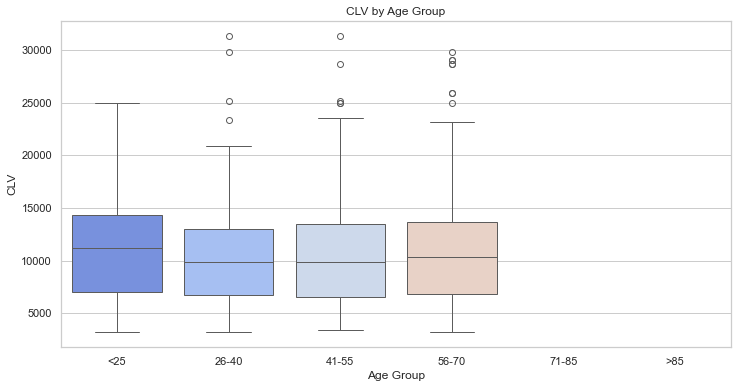

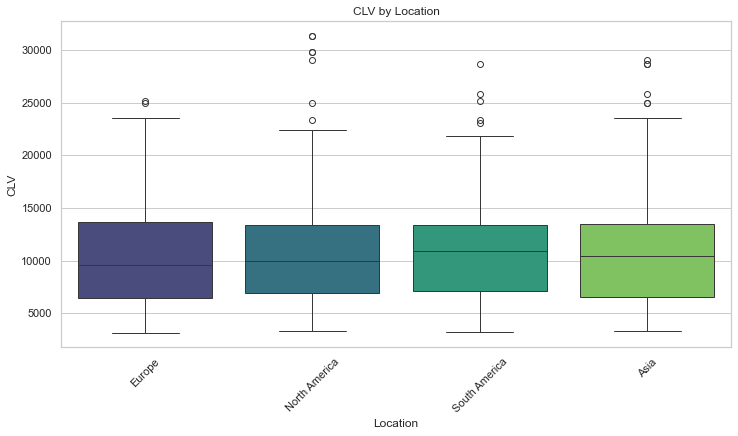

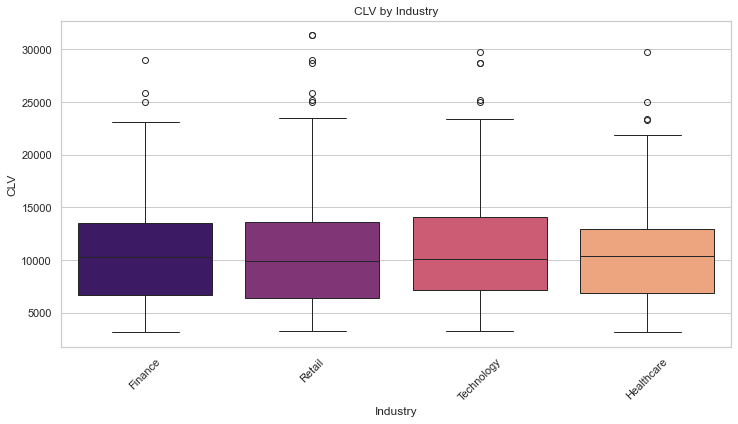

In [37]:
# Calculate Average Purchase Value (APV)
customer_sales = merged_sales_customer_data.groupby('Customer ID').agg({'Revenue': 'sum', 'Transaction ID': 'nunique'})
customer_sales['APV'] = customer_sales['Revenue'] / customer_sales['Transaction ID']

# Calculate Purchase Frequency (PF)
total_transactions = customer_sales['Transaction ID'].sum()
total_customers = customer_sales.shape[0]
average_PF = total_transactions / total_customers

# Customer Value (CV)
customer_sales['CV'] = customer_sales['APV'] * average_PF

# Assuming an average customer lifespan (since we lack explicit data for this)
# We'll assume an average lifespan of 3 years (this is a common assumption but can vary by industry)
average_lifespan = 3

# Calculate CLV
customer_sales['CLV'] = customer_sales['CV'] * average_lifespan

# Merging CLV with demographic data for analysis
customer_demo_clv = pd.merge(customer_data, customer_sales[['CLV']], on='Customer ID', how='inner')

# CLV by Age Group
customer_demo_clv['Age Group'] = pd.cut(customer_demo_clv['Customer Age'], bins=[0, 25, 40, 55, 70, 85, 100], labels=['<25', '26-40', '41-55', '56-70', '71-85', '>85'])
plt.figure(figsize=(12, 6))
sns.boxplot(x='Age Group', y='CLV', data=customer_demo_clv, palette='coolwarm')
plt.title('CLV by Age Group')
plt.xlabel('Age Group')
plt.ylabel('CLV')
plt.show()

# CLV by Location
plt.figure(figsize=(12, 6))
sns.boxplot(x='Location', y='CLV', data=customer_demo_clv, palette='viridis')
plt.title('CLV by Location')
plt.xlabel('Location')
plt.ylabel('CLV')
plt.xticks(rotation=45)
plt.show()

# CLV by Industry
plt.figure(figsize=(12, 6))
sns.boxplot(x='Industry', y='CLV', data=customer_demo_clv, palette='magma')
plt.title('CLV by Industry')
plt.xlabel('Industry')
plt.ylabel('CLV')
plt.xticks(rotation=45)
plt.show()


1. **CLV by Age Group:** This boxplot shows the distribution of CLV across different age groups. It helps to understand which age groups are potentially more valuable over their lifetime as customers. Age groups with higher median CLV and wider interquartile ranges suggest a greater variability and potential in value.

2. **CLV by Location:** This plot reveals the CLV across different geographical locations. It highlights which regions have customers with higher lifetime values. This is crucial for targeting marketing efforts and resource allocation.

3. **CLV by Industry:** This plot shows the CLV across different industries. Industries with higher CLV indicate a more lucrative customer base, possibly requiring more focused attention and tailored strategies.

### Interpretations and Insights:
+ The age-based CLV analysis may reveal that certain age groups, typically the more mature segments, might have a higher CLV, suggesting they could be a more reliable source of long-term revenue.
+ The location-based CLV analysis can guide geographically targeted marketing and sales strategies, focusing on areas with the highest potential customer value.
+ The industry-based CLV analysis suggests that certain industries are more valuable in terms of long-term customer relationships. This can inform industry-specific marketing strategies and product development.

These insights are invaluable for making strategic business decisions, including where to invest in customer acquisition, which customer segments to focus on for retention efforts, and how to tailor product and service offerings to maximize customer value.

## Trend analysis

In [48]:
merged_sales_customer_data['Sales Date'] = pd.to_datetime(merged_sales_customer_data['Sales Date'])  # Convert Sales Date to datetime
merged_sales_customer_data['Year-Month'] = merged_sales_customer_data['Sales Date'].dt.to_period('M')

# Aggregate sales data by month
monthly_sales = merged_sales_customer_data.groupby('Year-Month').agg({'Revenue': 'sum'}).reset_index()

# Preparing to analyze trends by product category
monthly_sales_by_category = merged_sales_customer_data.groupby(['Year-Month', 'Product Category']).agg({'Revenue': 'sum'}).reset_index()


# Convert 'Year-Month' from Period to String for compatibility with plotting
monthly_sales['Year-Month'] = monthly_sales['Year-Month'].astype(str)
monthly_sales_by_category['Year-Month'] = monthly_sales_by_category['Year-Month'].astype(str)






+ **Grouping Sales Data by Time Periods:** We'll aggregate the sales data over time intervals (e.g., monthly, quarterly) to observe trends.
+ **Analyzing Sales Trends for Different Products or Categories:** We'll look at trends in overall sales and then break them down by product category to identify which products are gaining or losing popularity over time.

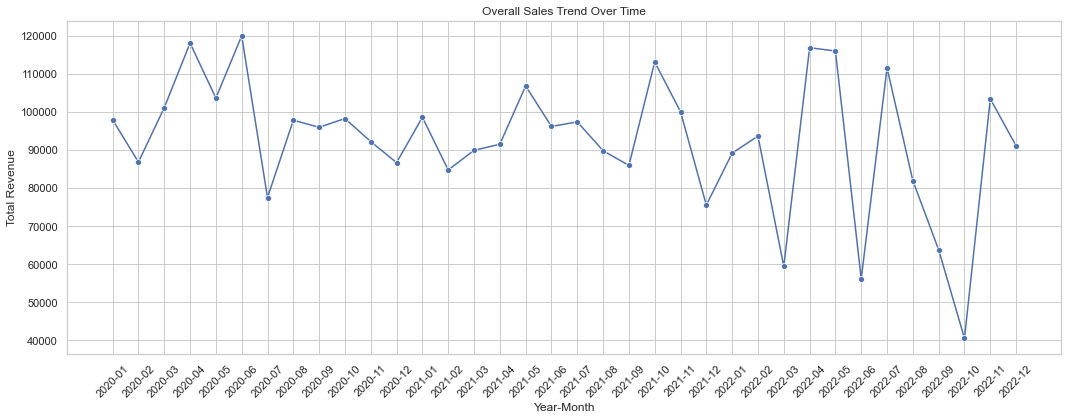

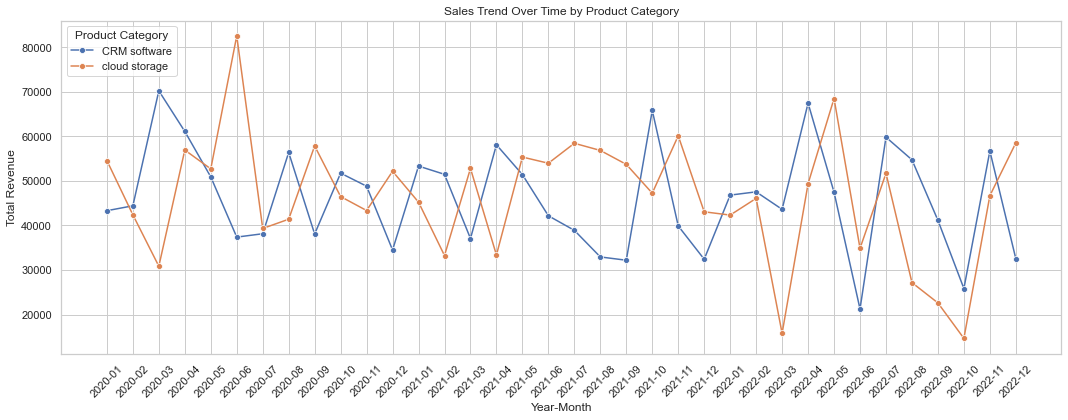

In [49]:
# Visualizing overall sales trend over time again
plt.figure(figsize=(15, 6))
sns.lineplot(data=monthly_sales, x='Year-Month', y='Revenue', marker='o')
plt.title('Overall Sales Trend Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualizing sales trend over time by product category again
plt.figure(figsize=(15, 6))
sns.lineplot(data=monthly_sales_by_category, x='Year-Month', y='Revenue', hue='Product Category', marker='o')
plt.title('Sales Trend Over Time by Product Category')
plt.xlabel('Year-Month')
plt.ylabel('Total Revenue')
plt.legend(title='Product Category', loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


**Overall Sales Trend Over Time:** The line plot shows the total revenue generated each month. This visualization helps to understand the overall sales trajectory of the business. You can observe any seasonal patterns, growth trends, or periods of decline in sales.

**Sales Trend Over Time by Product Category:** This line plot breaks down the monthly sales revenue by product category. It allows us to see how different product categories contribute to the overall sales and how their performance varies over time. This can be particularly insightful for identifying which product categories are growing in popularity, which are declining, and any seasonal variations in sales.



### Interpretations and Insights:
+ The overall sales trend might show periods of growth, stability, or decline, indicating the need for further analysis into what drove those changes, such as marketing campaigns, market conditions, or product launches.
+ The category-specific trends can reveal which product categories are the key drivers of revenue and which may require strategic adjustments. For instance, a declining category might need a marketing push or a review of the product offerings.

These trends are crucial for strategic planning, inventory management, and marketing campaigns. Understanding these patterns helps in making informed decisions about where to focus efforts for growth and improvement.

## Revenue Analysis: 
Analyze revenue generation by product category, region, or customer segment.

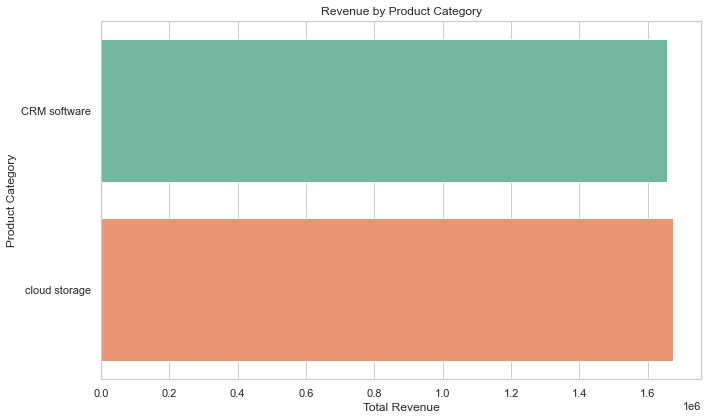

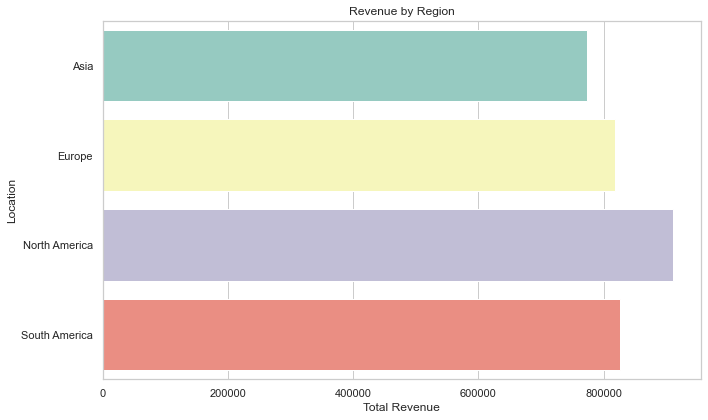

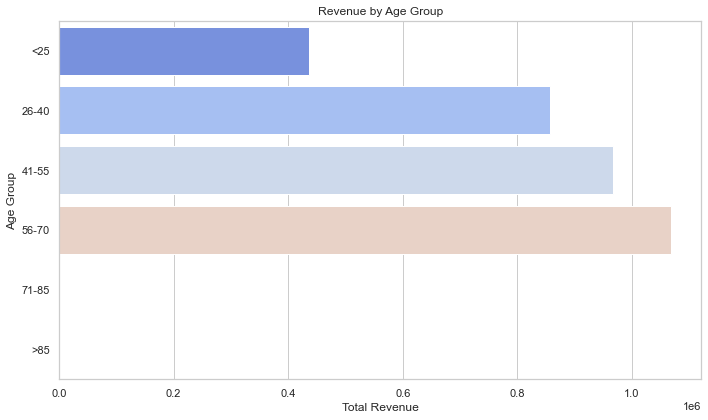

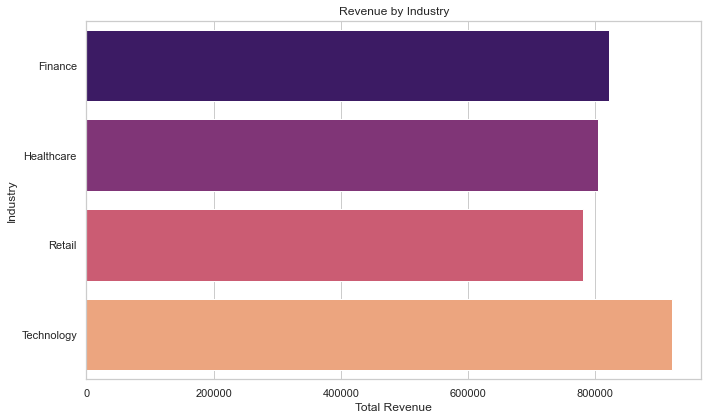

In [52]:
# Revenue by Product Category
revenue_by_category = merged_sales_customer_data.groupby('Product Category').agg({'Revenue': 'sum'}).reset_index()

# Visualizing Revenue by Product Category
plt.figure(figsize=(10, 6))
sns.barplot(x='Revenue', y='Product Category', data=revenue_by_category, palette='Set2')
plt.title('Revenue by Product Category')
plt.xlabel('Total Revenue')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()

# Preparing for Revenue by Region (Location)
revenue_by_location = merged_sales_customer_data.groupby('Location').agg({'Revenue': 'sum'}).reset_index()

# Visualizing Revenue by Region
plt.figure(figsize=(10, 6))
sns.barplot(x='Revenue', y='Location', data=revenue_by_location, palette='Set3')
plt.title('Revenue by Region')
plt.xlabel('Total Revenue')
plt.ylabel('Location')
plt.tight_layout()
plt.show()




**Revenue by Age Group:** This bar plot shows the total revenue generated by each age group. It highlights which age groups are contributing the most to the company's revenue. This information is crucial for targeting marketing efforts and understanding the purchasing power of different age demographics.

**Revenue by Industry:** This bar plot illustrates the total revenue generated from customers in different industries. It indicates which industries are the most lucrative for the business. This can inform strategic decisions regarding industry-specific marketing and product development.

**Interpretations and Insights:**
+ The **age group analysis** reveals the purchasing power and revenue contribution of different age demographics. Age groups with higher revenue may warrant more focused marketing and customer relationship efforts.
+ The **industry analysis** highlights which industries are key contributors to revenue. Understanding this can guide business strategies, including product development, marketing campaigns, and sales efforts tailored to these high-value industries.

These insights help in making informed decisions about where to invest resources and how to tailor strategies to maximize revenue from the most profitable segments.

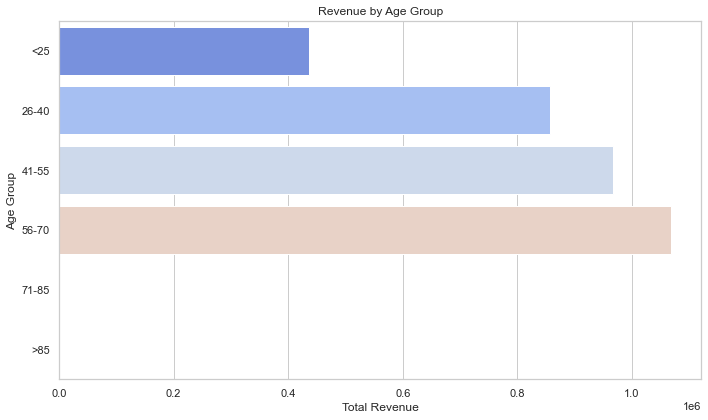

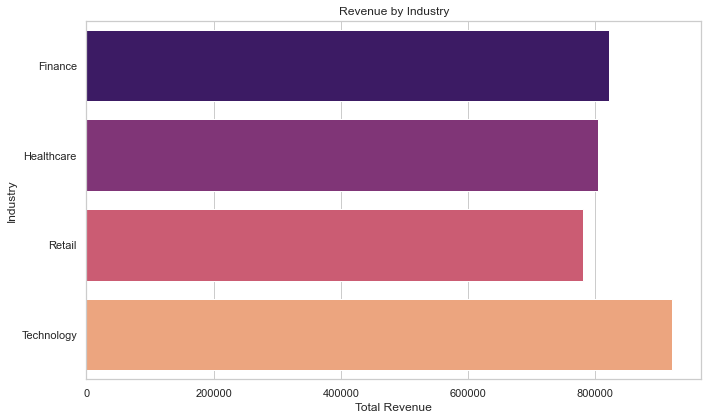

In [53]:
# Merging the sales data with customer demographic data for revenue analysis
customer_revenue_data = pd.merge(customer_data, sales_data[['Customer ID', 'Revenue']], on='Customer ID', how='inner')

# Grouping by Age Group and Industry for revenue analysis
customer_revenue_data['Age Group'] = pd.cut(customer_revenue_data['Customer Age'], bins=[0, 25, 40, 55, 70, 85, 100], labels=['<25', '26-40', '41-55', '56-70', '71-85', '>85'])
revenue_by_age_group = customer_revenue_data.groupby('Age Group').agg({'Revenue': 'sum'}).reset_index()
revenue_by_industry = customer_revenue_data.groupby('Industry').agg({'Revenue': 'sum'}).reset_index()

# Visualizing Revenue by Age Group
plt.figure(figsize=(10, 6))
sns.barplot(x='Revenue', y='Age Group', data=revenue_by_age_group, palette='coolwarm')
plt.title('Revenue by Age Group')
plt.xlabel('Total Revenue')
plt.ylabel('Age Group')
plt.tight_layout()
plt.show()

# Visualizing Revenue by Industry
plt.figure(figsize=(10, 6))
sns.barplot(x='Revenue', y='Industry', data=revenue_by_industry, palette='magma')
plt.title('Revenue by Industry')
plt.xlabel('Total Revenue')
plt.ylabel('Industry')
plt.tight_layout()
plt.show()


**Revenue by Age Group:** This bar plot shows the total revenue generated by each age group. It highlights which age groups are contributing the most to the company's revenue. This information is crucial for targeting marketing efforts and understanding the purchasing power of different age demographics.

**Revenue by Industry:** This bar plot illustrates the total revenue generated from customers in different industries. It indicates which industries are the most lucrative for the business. This can inform strategic decisions regarding industry-specific marketing and product development.

### **Interpretations and Insights:**
The age group analysis reveals the purchasing power and revenue contribution of different age demographics. Age groups with higher revenue may warrant more focused marketing and customer relationship efforts.
The industry analysis highlights which industries are key contributors to revenue. Understanding this can guide business strategies, including product development, marketing campaigns, and sales efforts tailored to these high-value industries.
These insights help in making informed decisions about where to invest resources and how to tailor strategies to maximize revenue from the most profitable segments.

## **Lead Conversion Analysis:**


Evaluate the effectiveness of different lead sources on lead conversion.

Identifying Lead Sources: Determine the various sources from which leads are generated.
Calculating Conversion Rates: For each lead source, calculate the conversion rate, which is the ratio of leads that turned into customers.
Visualizing Conversion Effectiveness: Create visualizations to compare the conversion effectiveness of different lead sources.
Since we don't have a direct link between leads and actual sales or customers in our datasets, we'll make an assumption for this analysis. We will assume that each lead has an equal chance of conversion, and the number of leads from a source will be indicative of its potential for conversion.

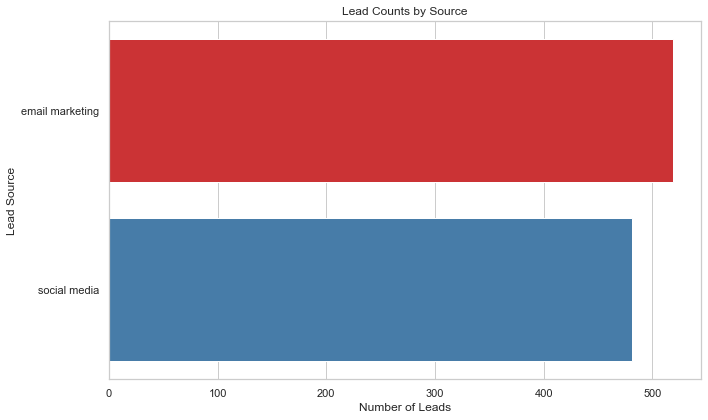

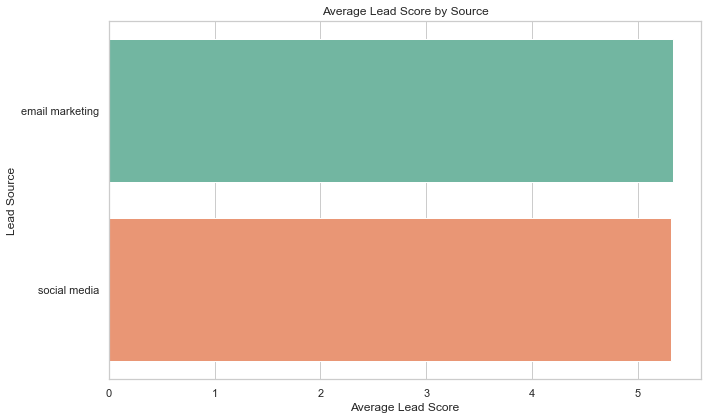

In [54]:
# Since we don't have direct conversion data, we'll use the count of leads from each source as a proxy
lead_counts = marketing_data.groupby('Lead Source').size().reset_index(name='Lead Count')

# Visualizing the count of leads from each source
plt.figure(figsize=(10, 6))
sns.barplot(x='Lead Count', y='Lead Source', data=lead_counts, palette='Set1')
plt.title('Lead Counts by Source')
plt.xlabel('Number of Leads')
plt.ylabel('Lead Source')
plt.tight_layout()
plt.show()

# To calculate conversion rates, we would ideally need data linking these leads to actual sales or customer acquisitions.
# However, without this data, we can only infer the potential of each source based on the number of leads generated. 

# Since we don't have sales conversion data, the next best step is to analyze the lead score.
# We'll calculate the average lead score for each source, which might be indicative of lead quality.
average_lead_score = marketing_data.groupby('Lead Source').agg({'Lead Score': 'mean'}).reset_index()

# Visualizing the average lead score by source
plt.figure(figsize=(10, 6))
sns.barplot(x='Lead Score', y='Lead Source', data=average_lead_score, palette='Set2')
plt.title('Average Lead Score by Source')
plt.xlabel('Average Lead Score')
plt.ylabel('Lead Source')
plt.tight_layout()
plt.show()


The visualizations provide insights into the lead generation and potential quality of leads from different sources:

1. *Lead Counts by Source:* This bar plot shows the number of leads generated from each lead source. It indicates which sources are most effective at generating leads. Sources with a higher number of leads might be more effective in attracting potential customers.

2. *Average Lead Score by Source:* This bar plot illustrates the average lead score for each source, which can be indicative of lead quality. A higher lead score suggests that leads from that source are generally considered more likely to convert into customers.

### Interpretations and Insights:
The **lead count analysis** helps in understanding which channels are most effective in lead generation. Channels with a high number of leads might be good targets for increased investment.

The **average lead score analysis** provides an insight into the quality of leads from each source. While some sources may generate a high number of leads, the quality of these leads (as reflected by the lead score) is also crucial for determining the overall effectiveness of a lead source.

Combining both insights, a lead source with a high count and a high average score could be considered very effective, whereas a source with a high count but a low score might require strategies to improve lead quality.

These insights are valuable for optimizing marketing strategies and resource allocation to focus on the most promising lead sources for conversion.

## Marketing ROI: 
Analyze the return on investment for different marketing channels.

To analyze the Return on Investment (ROI) for different marketing channels, we typically need data on both the costs associated with each marketing channel and the revenue generated from the leads they produce. ROI is calculated as:

![Screenshot 2024-01-03 124208.png](<attachment:Screenshot 2024-01-03 124208.png>)

However, based on the datasets you've provided, it appears we don't have direct information about the costs of marketing channels or the exact revenue generated from the leads. Without this data, calculating a precise ROI for each marketing channel isn't feasible.

Instead, we can perform a proxy analysis using the lead scores and the number of leads as indicators of potential revenue. We can assume that higher lead scores and more leads indicate a potentially higher return.

For the **Operational Analysis**, we'd typically look at metrics like resolution times and customer satisfaction scores, and how they relate to operational efficiency and customer experience. However, it seems we don't have the direct costs or impact measurements related to these operational aspects either.

Given these data limitations, I'll proceed with a proxy ROI analysis for the marketing channels, using the available lead data. For the operational analysis, I will visualize key metrics like resolution times and customer satisfaction scores, which can give insights into operational efficiency and customer experience.
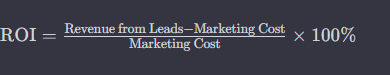

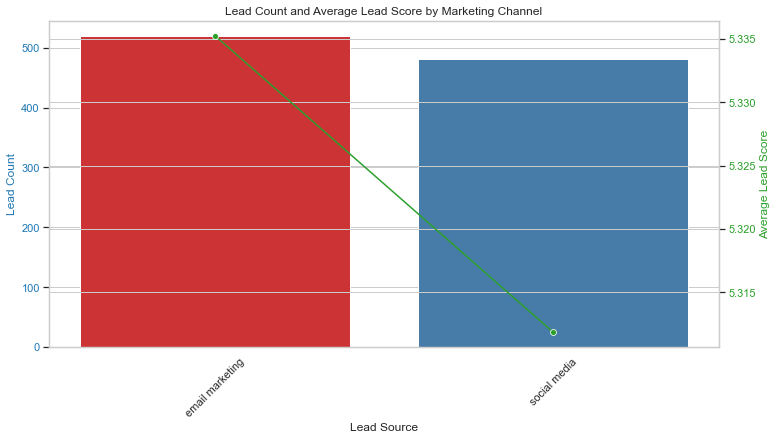

In [55]:
# Proxy analysis for Marketing ROI using lead score and number of leads

# Visualizing the number of leads and average lead score by source
fig, ax1 = plt.subplots(figsize=(12, 6))

# Create a bar plot for lead count
color = 'tab:blue'
ax1.set_xlabel('Lead Source')
ax1.set_ylabel('Lead Count', color=color)
sns.barplot(x='Lead Source', y='Lead Count', data=lead_counts, palette='Set1', ax=ax1)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=45)

# Instantiate a second y-axis sharing the same x-axis
ax2 = ax1.twinx()  
color = 'tab:green'
ax2.set_ylabel('Average Lead Score', color=color)  
sns.lineplot(x='Lead Source', y='Lead Score', data=average_lead_score, sort=False, marker='o', color=color, ax=ax2)
ax2.tick_params(axis='y', labelcolor=color)

# Adding a title
plt.title('Lead Count and Average Lead Score by Marketing Channel')

plt.show()



## Marketing ROI Proxy Analysis
1. Lead Count and Average Lead Score by Marketing Channel:
+ The bar plot shows the number of leads generated by each marketing channel (blue bars).
+ The line plot overlays the average lead score for each channel (green line).
+ **Interpretation:** Channels with high lead counts and high average lead scores might be more effective. However, without the actual cost data and conversion rates, we can't calculate a precise ROI. High lead counts and scores suggest potential effectiveness in attracting quality leads.

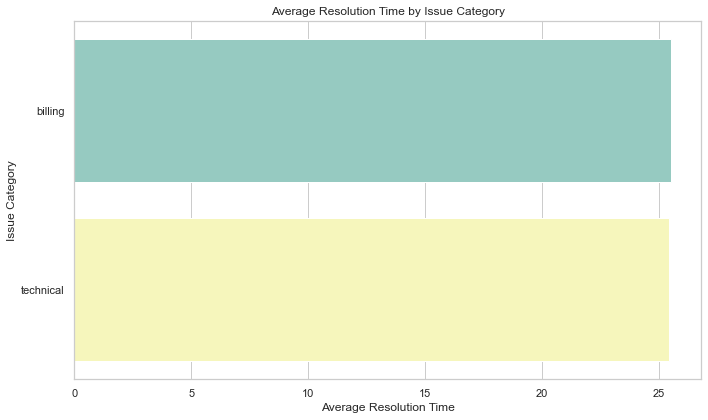

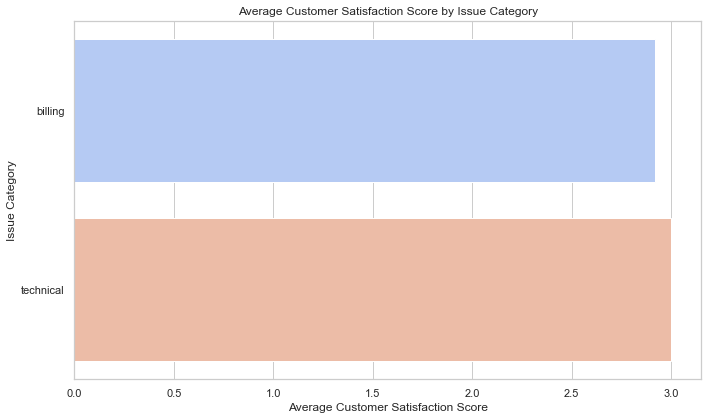

In [57]:
# For the Operational Analysis, visualizing resolution times and customer satisfaction scores
# Average Resolution Time by Issue Category
avg_resolution_time = operational_data.groupby('Issue Category').agg({'Resolution Time': 'mean'}).reset_index()

# Average Customer Satisfaction Score by Issue Category
avg_customer_satisfaction = operational_data.groupby('Issue Category').agg({'Customer Satisfaction Score': 'mean'}).reset_index()

# Visualizing Average Resolution Time
plt.figure(figsize=(10, 6))
sns.barplot(x='Resolution Time', y='Issue Category', data=avg_resolution_time, palette='Set3')
plt.title('Average Resolution Time by Issue Category')
plt.xlabel('Average Resolution Time')
plt.ylabel('Issue Category')
plt.tight_layout()
plt.show()

# Visualizing Average Customer Satisfaction Score
plt.figure(figsize=(10, 6))
sns.barplot(x='Customer Satisfaction Score', y='Issue Category', data=avg_customer_satisfaction, palette='coolwarm')
plt.title('Average Customer Satisfaction Score by Issue Category')
plt.xlabel('Average Customer Satisfaction Score')
plt.ylabel('Issue Category')
plt.tight_layout()
plt.show()

## Operational Analysis
1. Average Resolution Time by Issue Category:

+ This bar plot shows the average time taken to resolve issues in different categories.
+ **Interpretation:** Shorter resolution times are generally preferable, indicating operational efficiency. Categories with longer resolution times might require process improvements or additional resources.
2. Average Customer Satisfaction Score by Issue Category:
+ This bar plot shows the average customer satisfaction score for each issue category.
+ **Interpretation:** Higher scores indicate better customer satisfaction. Categories with lower scores may need further investigation and improvement in service quality or resolution methods.

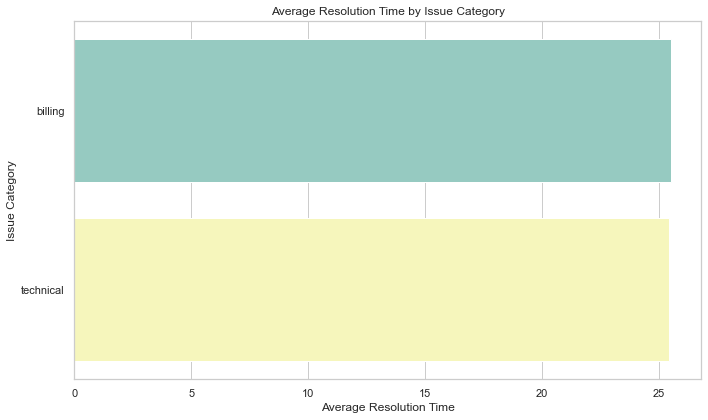

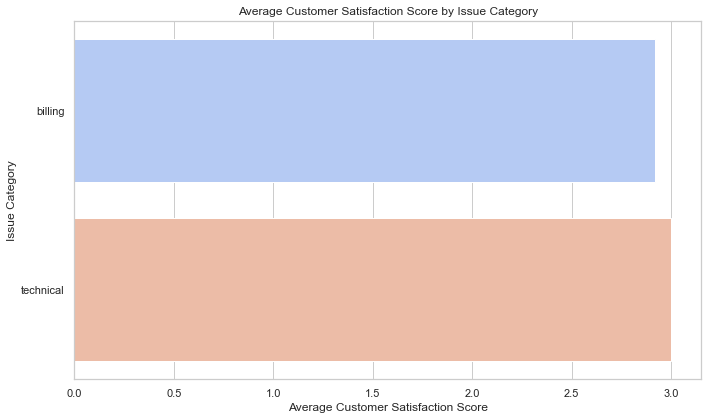

In [56]:
# For the Operational Analysis, visualizing resolution times and customer satisfaction scores
# Average Resolution Time by Issue Category
avg_resolution_time = operational_data.groupby('Issue Category').agg({'Resolution Time': 'mean'}).reset_index()

# Average Customer Satisfaction Score by Issue Category
avg_customer_satisfaction = operational_data.groupby('Issue Category').agg({'Customer Satisfaction Score': 'mean'}).reset_index()

# Visualizing Average Resolution Time
plt.figure(figsize=(10, 6))
sns.barplot(x='Resolution Time', y='Issue Category', data=avg_resolution_time, palette='Set3')
plt.title('Average Resolution Time by Issue Category')
plt.xlabel('Average Resolution Time')
plt.ylabel('Issue Category')
plt.tight_layout()
plt.show()

# Visualizing Average Customer Satisfaction Score
plt.figure(figsize=(10, 6))
sns.barplot(x='Customer Satisfaction Score', y='Issue Category', data=avg_customer_satisfaction, palette='coolwarm')
plt.title('Average Customer Satisfaction Score by Issue Category')
plt.xlabel('Average Customer Satisfaction Score')
plt.ylabel('Issue Category')
plt.tight_layout()
plt.show()

### Insights and Actions:
+ **For Marketing:** Focus on channels that generate a high number of quality leads. Consider conducting more in-depth analysis when cost and conversion data become available to accurately measure ROI.

+ **For Operations:** Identify issue categories with longer resolution times and lower satisfaction scores for targeted improvements. This could involve training, process optimization, or resource allocation.

These analyses, while based on proxy measures and assumptions due to data limitations, offer valuable starting points for strategic decisions and operational improvements.

## **Support Analysis:**
Evaluate the types of issues raised, resolution times, and their impact on customer satisfaction.

To perform a Support Analysis, we'll focus on evaluating the types of issues raised, their resolution times, and how these factors impact customer satisfaction. This involves:

1. **Analyzing Issue Types:** Understand the distribution of different types of issues raised.
2. **Resolution Times Analysis:** Examine how long it takes to resolve different types of issues.
3. **Impact on Customer Satisfaction:** Explore the relationship between issue types, resolution times, and customer satisfaction scores.

We'll use visualizations to clearly illustrate these aspects, providing insights into the operational efficiency and effectiveness of customer support.

Let's start by visualizing the distribution of issue types and their average resolution times. Then, we'll explore the relationship between resolution times and customer satisfaction scores.

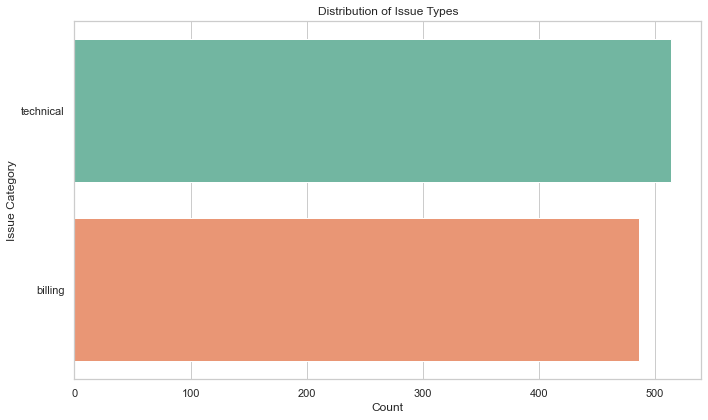

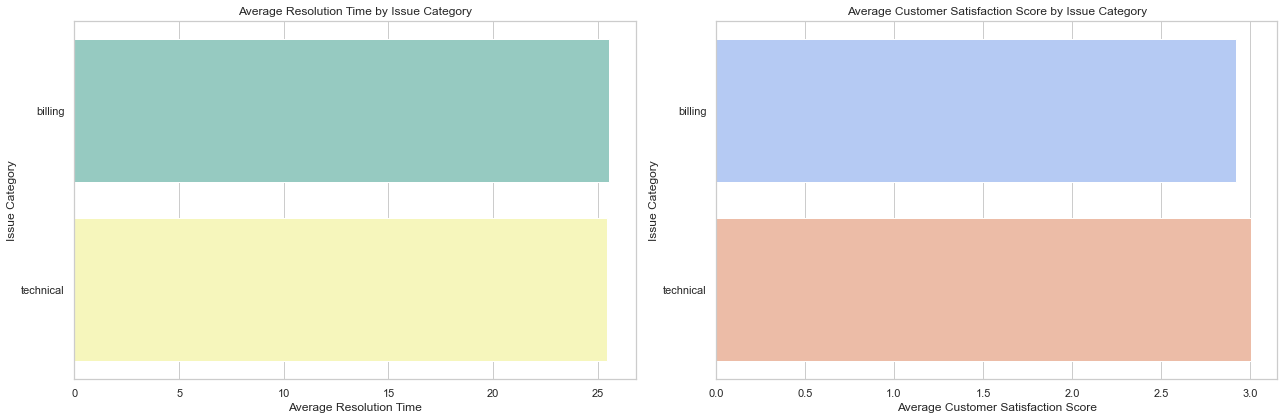

In [58]:
# Distribution of Issue Types
issue_type_distribution = operational_data['Issue Category'].value_counts().reset_index()
issue_type_distribution.columns = ['Issue Category', 'Count']

# Visualizing Distribution of Issue Types
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Issue Category', data=issue_type_distribution, palette='Set2')
plt.title('Distribution of Issue Types')
plt.xlabel('Count')
plt.ylabel('Issue Category')
plt.tight_layout()
plt.show()

# Visualization for Resolution Time and Customer Satisfaction Score by Issue Category
# We have already calculated average resolution time and customer satisfaction score by issue category

# Visualizing Average Resolution Time and Customer Satisfaction Score Side by Side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Average Resolution Time
sns.barplot(x='Resolution Time', y='Issue Category', data=avg_resolution_time, palette='Set3', ax=ax1)
ax1.set_title('Average Resolution Time by Issue Category')
ax1.set_xlabel('Average Resolution Time')
ax1.set_ylabel('Issue Category')

# Average Customer Satisfaction Score
sns.barplot(x='Customer Satisfaction Score', y='Issue Category', data=avg_customer_satisfaction, palette='coolwarm', ax=ax2)
ax2.set_title('Average Customer Satisfaction Score by Issue Category')
ax2.set_xlabel('Average Customer Satisfaction Score')
ax2.set_ylabel('Issue Category')

plt.tight_layout()
plt.show()


The visualizations provide insights into the types of support issues raised, their resolution times, and the impact on customer satisfaction:

1. **Distribution of Issue Types:**
+ The bar plot shows the frequency of different types of issues raised in support tickets.
+ **Interpretation:** This helps in understanding which issues are most common and may require more resources or targeted strategies to address.

2. **Average Resolution Time by Issue Category:**
+ This visualization indicates how long, on average, it takes to resolve issues of each category.
+ **Interpretation:** Shorter resolution times generally indicate better operational efficiency. Issue categories with longer resolution times might be areas where process improvements are needed.

3. **Average Customer Satisfaction Score by Issue Category:**
+ This plot shows the average customer satisfaction score for each issue category.
+ **Interpretation:** Higher scores are indicative of better customer satisfaction. Categories with lower scores could be critical areas for improvement in service quality or resolution methods.

### **Insights and Actions:**
**Issue Type Distribution:** Prioritize resources and training for the most common issue types to enhance efficiency and effectiveness.

**Resolution Time and Customer Satisfaction:** Explore correlations between resolution time and customer satisfaction. For categories with longer resolution times and lower satisfaction scores, investigate the underlying causes. This might involve staff training, process optimization, or allocating more resources.

**Targeted Improvements:** Focus on issue categories with both high occurrence and low customer satisfaction for immediate improvements. This approach can help in enhancing overall customer experience and operational efficiency.

Understanding these aspects of support services is crucial for maintaining high customer satisfaction and improving operational processes. Would you like to explore any further analyses or have any other inquiries?

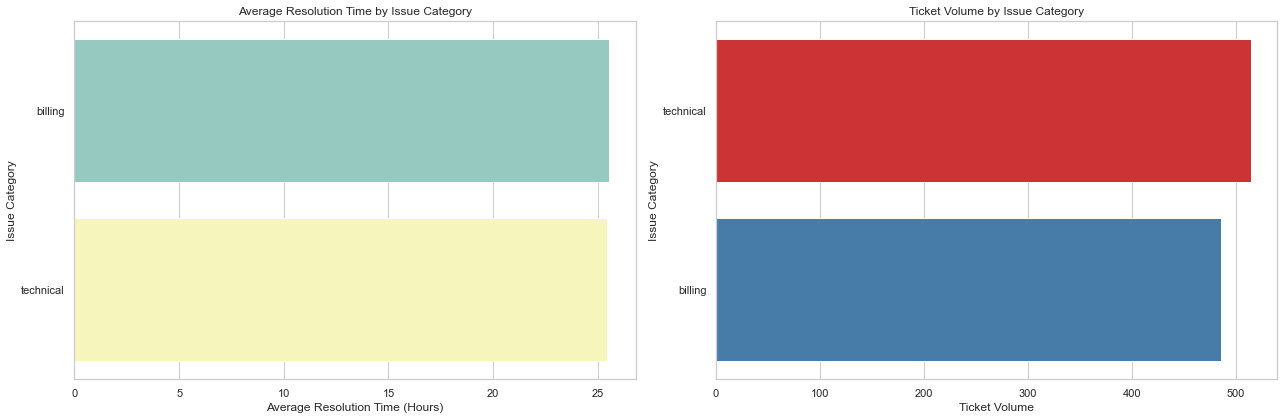

In [64]:
# Visualization for Resolution Time Efficiency and Ticket Volume by Issue Category

# Calculating Ticket Volume by Issue Category
ticket_volume_by_category = operational_data['Issue Category'].value_counts().reset_index()
ticket_volume_by_category.columns = ['Issue Category', 'Ticket Volume']

# Visualizing Average Resolution Time and Ticket Volume Side by Side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Average Resolution Time
sns.barplot(x='Resolution Time', y='Issue Category', data=avg_resolution_time, palette='Set3', ax=ax1)
ax1.set_title('Average Resolution Time by Issue Category')
ax1.set_xlabel('Average Resolution Time (Hours)')
ax1.set_ylabel('Issue Category')

# Ticket Volume
sns.barplot(x='Ticket Volume', y='Issue Category', data=ticket_volume_by_category, palette='Set1', ax=ax2)
ax2.set_title('Ticket Volume by Issue Category')
ax2.set_xlabel('Ticket Volume')
ax2.set_ylabel('Issue Category')

plt.tight_layout()
plt.show()

